# **Hotel Booking Cancellation Data Analysis Report**

## Importing Libraries:

In [1]:
# Importing necessary libraries
import numpy as np         # For numerical operations.
import pandas as pd        # For data manipulation and analysis.
import matplotlib.pyplot as plt   # For creating static, interactive, and animated visualization.
import seaborn as sns      # For drawing attractive statistical graphics built on Matplotlib

# Importing additional libraries for suppressing warnings
import warnings
warnings.filterwarnings("ignore")

# Set aesthetic style for plots using Seaborn.
sns.set_style("whitegrid")  # "Whitegrid" is a common and clean choice.

# To ensure that plots are displayed inline within the notebook output.
%matplotlib inline


## Loading The Dataset:

In [2]:
# Loading the dataset.
# The 'try-except' block to handle FileNotFoundError.
# If the CSV file isn't in the expected directory.
try:
    df = pd.read_csv("hotel_bookings.csv")
    print("Dataset Loaded Successfully!")
except FileNotFoundError:
    print("Error: 'hotel_bookings.csv' not found. Make sure the file is in the correct directory")
    pass


Dataset Loaded Successfully!


## Exploratory Data Analysis:

### Initial data inspection to understand its structure and contents.

In [3]:
# Displaying the top 5 rows of the DataFrame.
print("\nFirst 5 rows of the dataset:")
df.head()


First 5 rows of the dataset:


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [4]:
# Displaying the bottom 5 rows of the DataFrame.
print("\nLast 5 rows of the dataset:")
df.tail()


Last 5 rows of the dataset:


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,6/9/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,7/9/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,7/9/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,7/9/2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,7/9/2017


In [5]:
# Provide a concise summary of the DataFrame.
print("\nDataFrame Info:")
df.info()


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12 

In [6]:
# Getting the shape of the DataFrame.
df.shape

(119390, 32)

In [7]:
# Displaying all the column names.
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [8]:
# Generate descriptive statistics of object columns.
print("\nDescriptive Statistics of object datatype:")
df.describe(include='object')


Descriptive Statistics of object datatype:


,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,21/10/2015
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


In [9]:
# Generate descriptive statistics of numerical columns.
print("\nDescriptive Statistics of numerical datatype:")
df.describe()


Descriptive Statistics of numerical datatype:


,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


## Data Cleaning and Preprocessing:

In [10]:
# Datatype consistency
## DataFrame consists of different datatypes, but the datetime column has the object datatype.
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format='%d/%m/%Y')

In [11]:
# Getting the unique values in the object columns.
for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print("-" * 50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [12]:
# Handling missing values strategically.
print("\nMissing values before cleaning:")
df.isnull().sum()


Missing values before cleaning:


hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [13]:
# 'country' column: Missing values are a small percentage.
# Filling with 'Unknown' indicates that country information is not available.
df["country"].fillna("Unknown", inplace=True)

In [14]:
# 'children' column: Missing values are a small percentage.
# Assuming missing values in the 'children' column means 0 children.
df["children"].fillna(0, inplace=True)

# Converting 'children' column datatype to integer, as 'children' count should be a whole number.
df["children"] = df["children"].astype(int)

In [15]:
# 'agent' and 'company' columns have a high number of missing values.
# We can either drop or fill the massing values with 0, indicating the absence of agent/company.
# Assuming 0 for the absence of agent/company makes the analysis better.
df["agent"].fillna(0, inplace=True)
df["company"].fillna(0, inplace=True)

In [16]:
# Data quality check: Remove rows where 'adr' (Average Daily Rate) is 0.
# An ADR of 0 typically indicates zero revenue, which affects our revenue analysis.
print(f"\nNumber of rows before removing ADR = 0: {len(df)}")
df = df[df["adr"] != 0]
print(f"\nNumber of rows after removing ADR = 0: {len(df)}")


Number of rows before removing ADR = 0: 119390

Number of rows after removing ADR = 0: 117431


In [17]:
# Creating 'total_nights'
# This combines weekend and weeknights in a single column.
df['total_nights'] = df['stays_in_week_nights'] + df['stays_in_weekend_nights']
print(f"\n Added 'total_nights' column. Example: {df['total_nights'].head()}")


 Added 'total_nights' column. Example: 2    1
3    1
4    2
5    2
6    2
Name: total_nights, dtype: int64


In [18]:
# Data quality check: Removing rows where 'total_nights' is 0.
# Booking with 0 night stay makes it illogical and might lead to a data error.
print(f"\nNumber of rows before removing 'total_nights' = 0: {len(df)}")
df = df[df['total_nights'] > 0]
print(f"\nNumber of rows after removing 'total_nights' = 0: {len(df)}")


Number of rows before removing 'total_nights' = 0: 117431

Number of rows after removing 'total_nights' = 0: 117431


In [19]:
# Data quality check: Removing rows where 'adr' is greater than 5000.
# It will make the data steady, as there are more outliers.
df = df[df["adr"] < 5000]

In [20]:
# Final check for any missing values.
print("\nMissing values after cleaning and processing:")
print(df.isnull().sum())
print(f"\nFinal DataFrame shape after cleaning: {df.shape}")


Missing values after cleaning and processing:
hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type    

## Data Analysis and Visualization:

   is_canceled  percentage
0            0   62.522354
1            1   37.477646


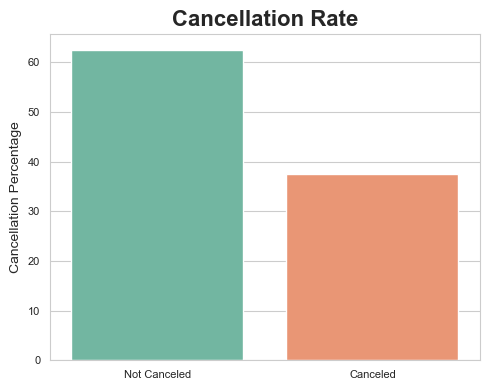


Overall Cancellation Rate: 37.48%


In [21]:
# Calculating the cancellation percentage.
cancel_perc = df['is_canceled'].value_counts(normalize=True) * 100
cancel_df = cancel_perc.reset_index()
cancel_df.columns = ['is_canceled', 'percentage']
print(cancel_df)

# Visualize cancellation percentage.
plt.figure(figsize=(5,4))
sns.barplot(data = cancel_df, x= 'is_canceled', y = 'percentage', palette='Set2')
plt.title("Cancellation Rate", fontsize=16, fontweight='bold')
plt.xlabel("")
plt.ylabel("Cancellation Percentage", fontsize = 10)
plt.xticks([0, 1], ['Not Canceled', 'Canceled'], fontsize=8)
plt.yticks(fontsize=8)
plt.tight_layout()
plt.show()

# Calculating the cancellation rate.
over_cancellation_rate = df['is_canceled'].mean() * 100
print(f"\nOverall Cancellation Rate: {over_cancellation_rate:.2f}%")

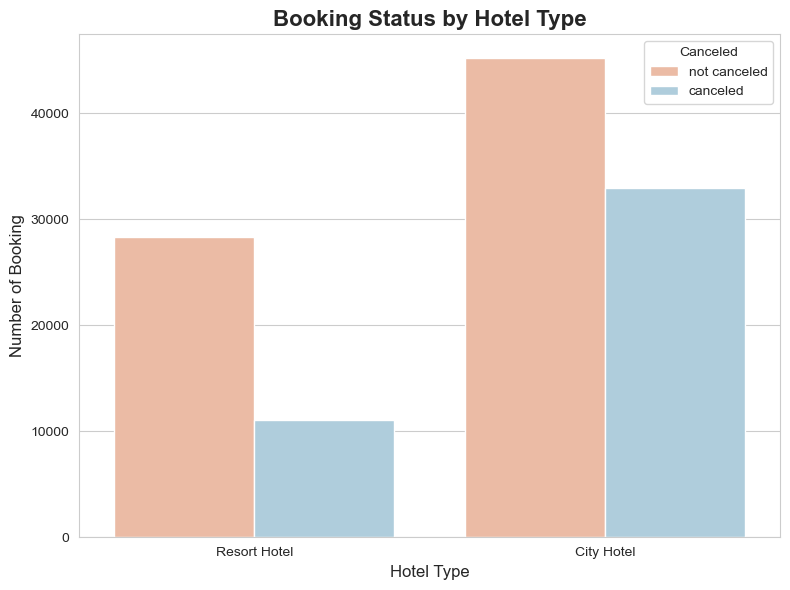


Cancellation Rate for City Hotel: 42.21%

Cancellation Rate for Resort Hotel: 28.08%


In [22]:
# Visualizing cancellation distribution by hotel type.
plt.figure(figsize=(8,6))
sns.countplot(data = df, x = "hotel", hue="is_canceled", palette="RdBu")
plt.title("Booking Status by Hotel Type", fontsize=16, fontweight='bold')
plt.xlabel("Hotel Type", fontsize=12)
plt.ylabel("Number of Booking", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Canceled", labels=["not canceled", "canceled"])
plt.tight_layout()
plt.show()

# Calculate and print cancellation rates per hotel type for a precise figure.
cancel_by_hotel = df.groupby("hotel")["is_canceled"].mean() * 100
print(f"\nCancellation Rate for City Hotel: {cancel_by_hotel['City Hotel']:.2f}%")
print(f"\nCancellation Rate for Resort Hotel: {cancel_by_hotel['Resort Hotel']:.2f}%")

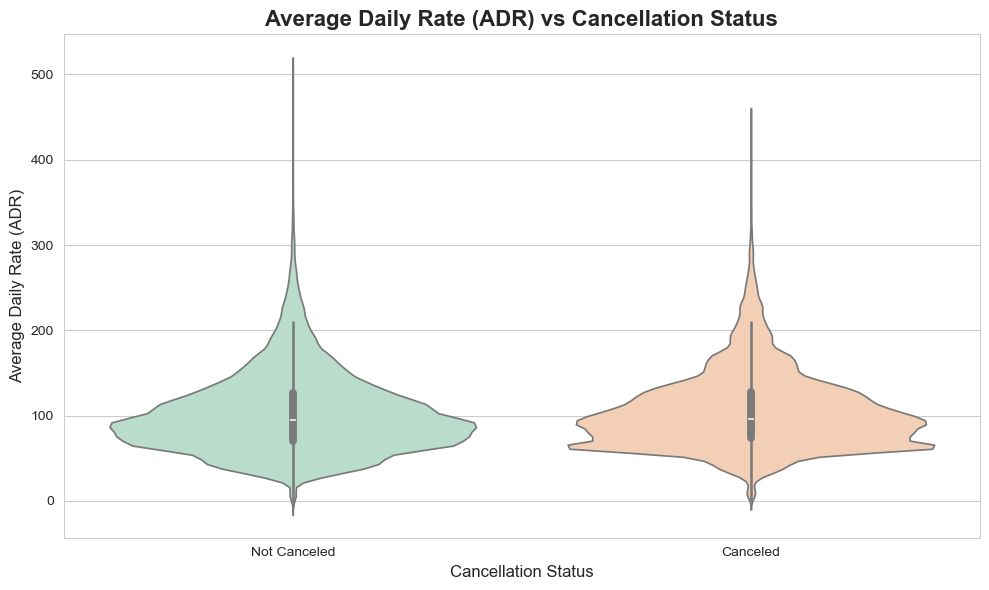


Median ADR for Canceled Bookings: 96.30

Median ADR for Non-Canceled Bookings: 94.50


In [23]:
# Visualizing the relationship between the price a customer pays and their likelihood to cancel.
plt.figure(figsize=(10,6))
sns.violinplot(data= df, x="is_canceled", y="adr", palette="Pastel2")
plt.title("Average Daily Rate (ADR) vs Cancellation Status", fontsize = 16, fontweight='bold')
plt.xlabel("Cancellation Status", fontsize = 12)
plt.ylabel("Average Daily Rate (ADR)", fontsize = 12)
plt.xticks(ticks=[0, 1], labels=["Not Canceled", "Canceled"], fontsize = 10)
plt.yticks(fontsize = 10)
plt.tight_layout()
plt.show()

# Calculate median ADR for canceled vs not canceled bookings for precise comparison.
median_adr_canceled = df[df["is_canceled"] == 1]["adr"].median()
median_adr_not_canceled = df[df["is_canceled"] == 0]["adr"].median()
print(f"\nMedian ADR for Canceled Bookings: {median_adr_canceled:.2f}")
print(f"\nMedian ADR for Non-Canceled Bookings: {median_adr_not_canceled:.2f}")

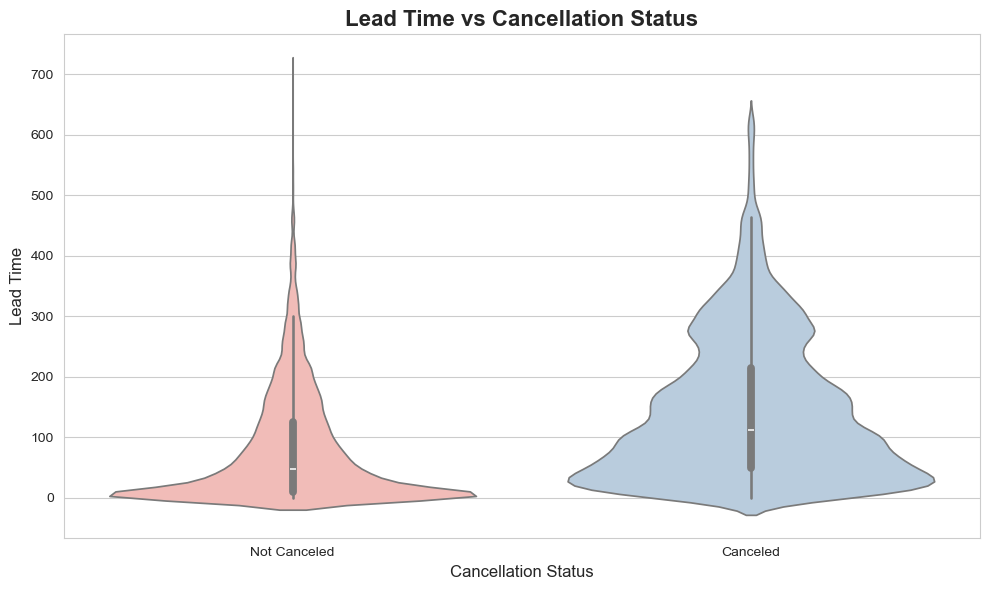


Median Lead Time for Canceled Bookings: 113 days

Median Lead Time for Non-Canceled Bookings: 47 days


In [24]:
# Visualizing the relationship between the customer lead time and likelihood to cancel.
plt.figure(figsize=(10,6))
sns.violinplot(data = df, x="is_canceled", y="lead_time", palette="Pastel1")
plt.title("Lead Time vs Cancellation Status", fontsize=16, fontweight='bold')
plt.xlabel("Cancellation Status", fontsize=12)
plt.ylabel("Lead Time", fontsize=12)
plt.xticks(ticks=[0,1], labels=["Not Canceled","Canceled"], fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

# Calculate the median lead time for canceled vs not canceled for precise comparison.
median_lead_time_canceled = df[df["is_canceled"] == 1]["lead_time"].median()
median_lead_time_not_canceled = df[df["is_canceled"] == 0]["lead_time"].median()
print(f"\nMedian Lead Time for Canceled Bookings: {median_lead_time_canceled:.0f} days")
print(f"\nMedian Lead Time for Non-Canceled Bookings: {median_lead_time_not_canceled:.0f} days")

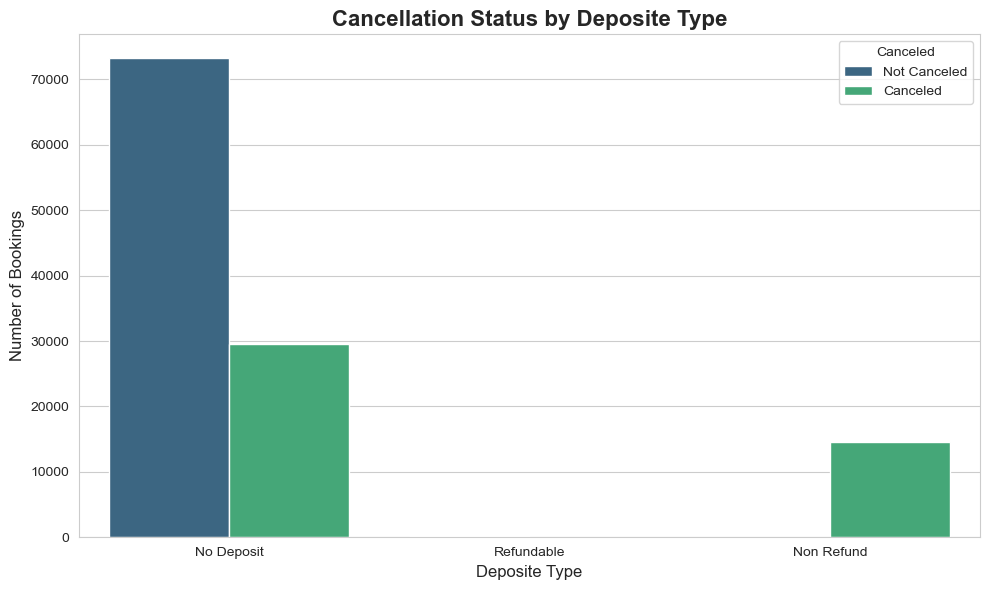


Cancellation Rate by Deposit Type:
deposit_type
No Deposit    28.710972
Non Refund    99.362402
Refundable    22.222222
Name: is_canceled, dtype: float64


In [25]:
# Visualizing the relationship between the customer deposit type affects cancellation behavior.
plt.figure(figsize=(10,6))
sns.countplot(data=df, x="deposit_type", hue="is_canceled", palette="viridis")
plt.title("Cancellation Status by Deposite Type", fontsize=16, fontweight='bold')
plt.xlabel("Deposite Type", fontsize=12)
plt.ylabel("Number of Bookings", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Canceled", labels=["Not Canceled","Canceled"], fontsize=10)
plt.tight_layout()
plt.show()

# Calculate cancellation rate per deposit type.
cancel_by_deposit = df.groupby("deposit_type")["is_canceled"].mean() * 100
print("\nCancellation Rate by Deposit Type:")
print(cancel_by_deposit)

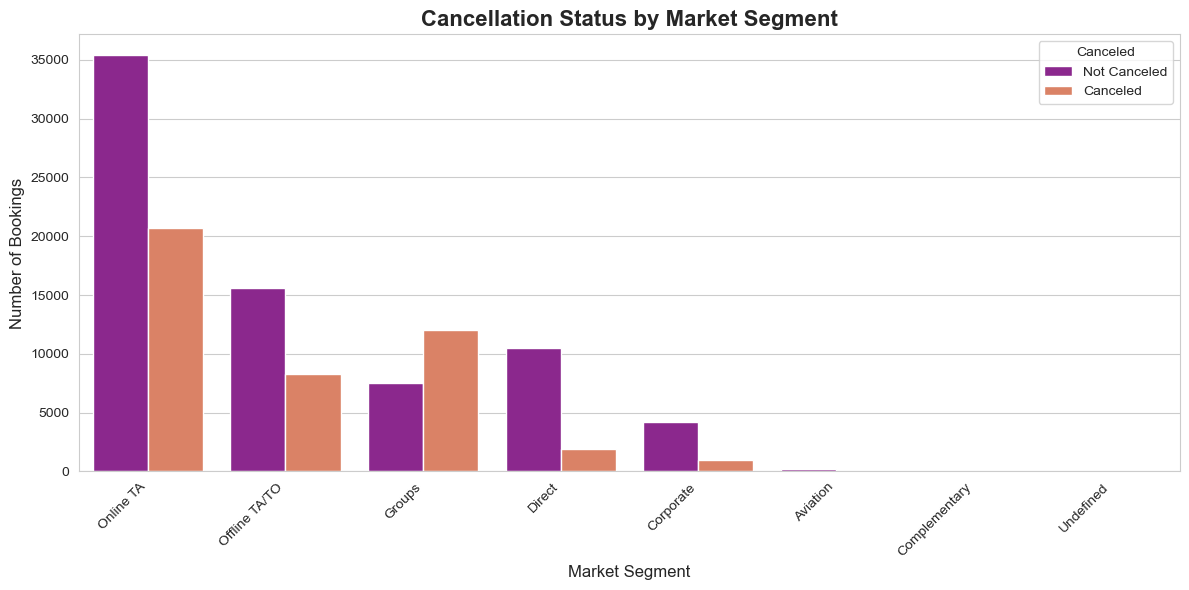


Cancellation Rate by Market Segment:
market_segment
Undefined        100.000000
Groups            61.726060
Online TA         36.925682
Offline TA/TO     34.622792
Aviation          22.077922
Corporate         18.933436
Direct            15.388970
Complementary      7.936508
Name: is_canceled, dtype: float64


In [26]:
# Visualize the relationship between the booking channel or customer origin with the cancellation rate.
plt.figure(figsize=(12,6))
# order=df["market_segment"].value_counts().index sort bars by frequency
sns.countplot(data=df, x="market_segment", hue="is_canceled", palette="plasma", order=df["market_segment"].value_counts().index)
plt.title("Cancellation Status by Market Segment", fontsize=16, fontweight='bold')
plt.xlabel("Market Segment", fontsize=12)
plt.ylabel("Number of Bookings", fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate lables for readability.
plt.yticks(fontsize=10)
plt.legend(title="Canceled", labels=["Not Canceled","Canceled"], fontsize=10)
plt.tight_layout()
plt.show()

# Calculate cancellation rate by market segment.
cancel_by_market_segment = df.groupby("market_segment")["is_canceled"].mean().sort_values(ascending=False) * 100
print("\nCancellation Rate by Market Segment:")
print(cancel_by_market_segment)

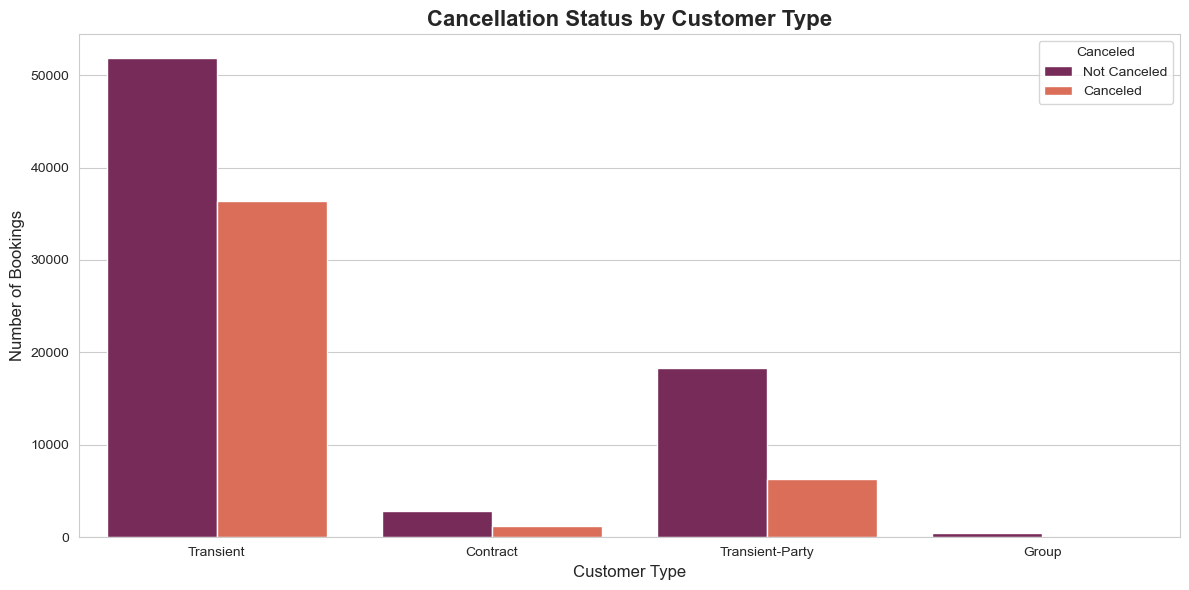


Cancellation Rate by Customer Type:
customer_type
Contract           31.120434
Group               7.720588
Transient          41.237721
Transient-Party    25.741732
Name: is_canceled, dtype: float64


In [27]:
# Visualize the relationship between the customer type and their cancellation tendencies.
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="customer_type", hue="is_canceled", palette="rocket")
plt.title("Cancellation Status by Customer Type", fontsize=16, fontweight='bold')
plt.xlabel("Customer Type", fontsize=12)
plt.ylabel("Number of Bookings", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Canceled", labels=["Not Canceled","Canceled"], fontsize=10)
plt.tight_layout()
plt.show()

# Calculate cancellation rate by customer type.
cancel_by_customer_type = df.groupby("customer_type")["is_canceled"].mean() * 100
print("\nCancellation Rate by Customer Type:")
print(cancel_by_customer_type)

In [28]:
# Create a DataFrame with only non-canceled bookings for revenue and market analysis.
df_not_canceled = df[df["is_canceled"] == 0].copy()  # .copy() prevents SetteingWithCopyWarning if we modify this DataFrame later.

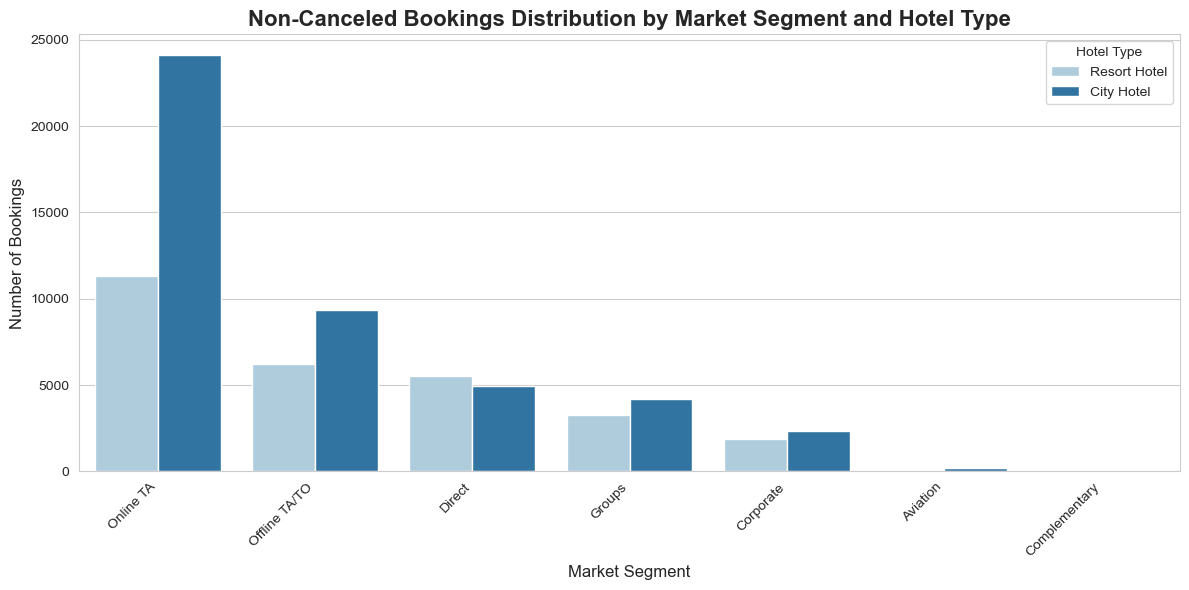


Proportion of Non-Canceled Bookings by Market Segments:
market_segment
Online TA        48.203487
Offline TA/TO    21.269409
Direct           14.250885
Groups           10.196132
Corporate         5.755925
Aviation          0.245165
Complementary     0.078998
Name: proportion, dtype: float64


In [29]:
# Visualizing the relation between the non-canceled bookings distribution by market segment and hotel type.
plt.figure(figsize=(12,6))
sns.countplot(data=df_not_canceled, x="market_segment", hue="hotel", palette="Paired", order=df_not_canceled["market_segment"].value_counts().index)
plt.title("Non-Canceled Bookings Distribution by Market Segment and Hotel Type", fontsize=16, fontweight='bold')
plt.xlabel("Market Segment", fontsize=12)
plt.ylabel("Number of Bookings", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Hotel Type", fontsize=10)
plt.tight_layout()
plt.show()

# Calculate the proportion of non-canceled bookings for each market segment.
market_segment_count = df_not_canceled["market_segment"].value_counts(normalize=True) * 100
print("\nProportion of Non-Canceled Bookings by Market Segments:")
print(market_segment_count)

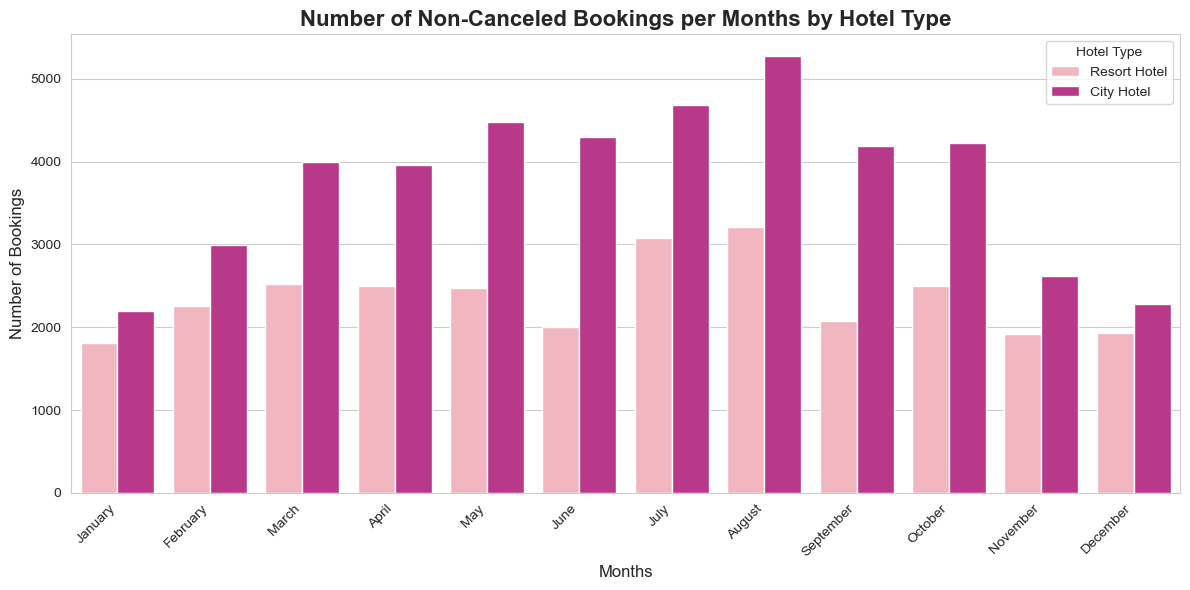

In [30]:
# Ensuring months are ordered chronologically for plotting.
month_order=["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
df_not_canceled["arrival_date_month"]=pd.Categorical(df_not_canceled["arrival_date_month"], categories=month_order, ordered=True)

# Visualize the relationship between the number of non-canceled bookings per month and different hotel types.
# Bookings per month (Non-Canceled) - shows demand by month.
plt.figure(figsize=(12,6))
sns.countplot(data=df_not_canceled, x="arrival_date_month", hue="hotel", palette="RdPu")
plt.title("Number of Non-Canceled Bookings per Months by Hotel Type", fontsize=16, fontweight='bold')
plt.xlabel("Months", fontsize=12)
plt.ylabel("Number of Bookings", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Hotel Type", fontsize=10)
plt.tight_layout()
plt.show()

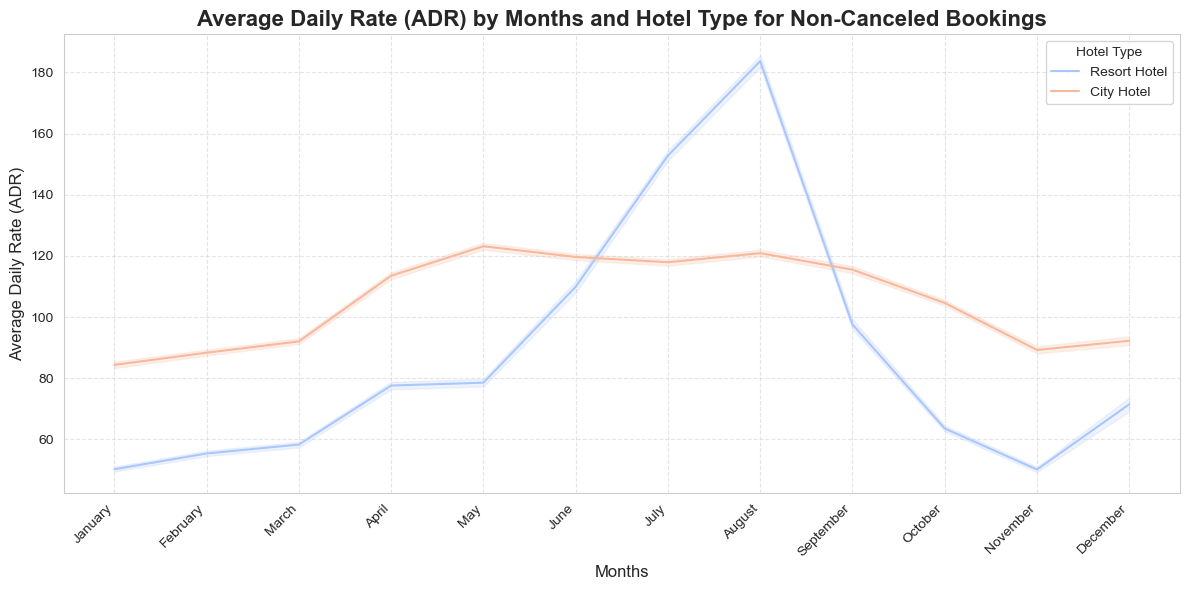

In [31]:
# Visualize the relationship between the average ADR by months for non-canceled bookings and different hotel types.
# Average ADR by Month (Non-Canceled) - shows price variation by month.
avg_adr_month = df_not_canceled.groupby(["arrival_date_month", "hotel"])["adr"].mean().reset_index()


plt.figure(figsize=(12,6))
sns.lineplot(data=df_not_canceled, x="arrival_date_month", y="adr", hue="hotel", markers="o", palette="coolwarm")
plt.title("Average Daily Rate (ADR) by Months and Hotel Type for Non-Canceled Bookings", fontsize=16, fontweight='bold')
plt.xlabel("Months", fontsize=12)
plt.ylabel("Average Daily Rate (ADR)", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Hotel Type", fontsize=10)
plt.grid(True, linestyle="--", alpha=0.5)  # Adding a grid for better reading of values.
plt.tight_layout()
plt.show()

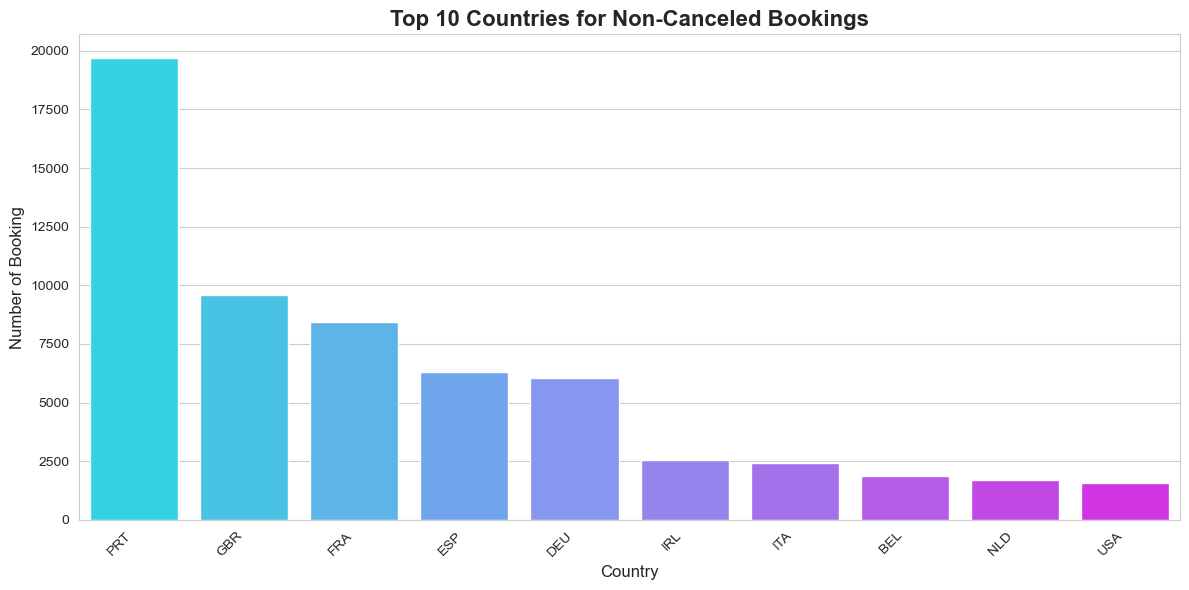

In [32]:
# Getting the top 10 countries for non-canceled bookings.
top_10_countries = df_not_canceled['country'].value_counts().head(10)

# Visualize the relation between the top 10 countries and non-canceled bookings.
plt.figure(figsize=(12,6))
sns.barplot(x=top_10_countries.index, y=top_10_countries.values, palette="cool")
plt.title("Top 10 Countries for Non-Canceled Bookings", fontsize=16, fontweight='bold')
plt.xlabel("Country", fontsize=12)
plt.ylabel("Number of Booking", fontsize=12)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()

## Conclusion:

City hotels receive more bookings but also face higher cancellation rates, highlighting the need for targeted retention strategies. Guests are particularly sensitive to price fluctuations, as higher Average Daily Rates often lead to increased cancellations. Bookings made far in advance show a stronger cancellation pattern, suggesting flexibility could improve early commitment. Online and Offline Travel Agent channels result in more cancellations compared to Direct and Corporate bookings, regardless of deposit type. Non-refundable deposits don't always deter cancellations, especially when agents are involved. Seasonality and geography matter too—summer and spring see more reliable bookings from countries like Portugal, the UK, and France.